In [1]:
import pandas as pd

In [3]:
dict1 = {'name' : ['홍길동', '홍길동', '김철수', '박영희', '김철수', '김철수', '홍길동'], 'korean':range(7)}  # korean 열은 0~6으로 채워넣기
df1 = pd.DataFrame(dict1)
df1

dict

In [4]:
dict2 = {'name':['김철수', '홍길동', '심수봉'], 'english': range(3)}
df2 = pd.DataFrame(dict2)
df2

,name,english
0,김철수,0
1,홍길동,1
2,심수봉,2


In [5]:
pd.merge(df1, df2, on='name')  ## on의 열을 기준으로 병합, name은 공통 열 이름
                               ## how의 디폴트 값을 inner(inner join: 교집합) 이다.

,name,korean,english
0,홍길동,0,1
1,홍길동,1,1
2,홍길동,6,1
3,김철수,2,0
4,김철수,4,0
5,김철수,5,0


In [11]:
print("how= 'outer' 라고 명시하면 full outer join 이다.")
pd.merge(df1, df2, how = 'outer')   # how = 'outer' : full outer join (모든 행들 포함)

how= 'outer' 라고 명시하면 full outer join 이다.


,name,korean,english
0,홍길동,0.0,1.0
1,홍길동,1.0,1.0
2,홍길동,6.0,1.0
3,김철수,2.0,0.0
4,김철수,4.0,0.0
5,김철수,5.0,0.0
6,박영희,3.0,NaN
7,심수봉,NaN,2.0


In [22]:
dict3 = {'leftkey': ['홍길동', '홍길동', '김철수', '박영희', '김철수', '김철수', '홍길동'], 'korean' : range(7)}
df3 = pd.DataFrame(dict3)
df3

,leftkey,korean
0,홍길동,0
1,홍길동,1
2,김철수,2
3,박영희,3
4,김철수,4
5,김철수,5
6,홍길동,6


In [23]:
dict4 = {'rightkey': ['김철수', '홍길동', '심수봉'], 'english': range(3)}
df4 = pd.DataFrame(dict4)
df4

,rightkey,english
0,김철수,0
1,홍길동,1
2,심수봉,2


In [24]:
# dict3와 dict4 의 공통된 컬럼이 없다! -> left_on, right_on 사용

In [25]:
pd.merge(df3, df4, left_on='leftkey', right_on='rightkey')   ## 공통 된 key 병합(박영희, 심수봉 빠짐)  
# left_on은 왼쪽 데이터인 df3의 컬럼이름, right_on은 오른쪽 데이터인 df4의 컬럼 이름

,leftkey,korean,rightkey,english
0,홍길동,0,홍길동,1
1,홍길동,1,홍길동,1
2,홍길동,6,홍길동,1
3,김철수,2,김철수,0
4,김철수,4,김철수,0
5,김철수,5,김철수,0


In [33]:
 # 여러 개의 키를 병합!
    
dict1 = {'key1': ['김철수', '김철수', '박영희'],
        'key2': ['one', 'two', 'one'],
        'leftval': [1,2,3]}
left = pd.DataFrame(dict1)
left

,key1,key2,leftval
0,김철수,one,1
1,김철수,two,2
2,박영희,one,3


In [34]:
dict2 = {'key1': ['김철수', '김철수', '박영희', '박영희'],
        'key2': ['one', 'one', 'one', 'two'],
        'leftval': [4, 5, 6, 7]}
right = pd.DataFrame(dict2)
right

,key1,key2,leftval
0,김철수,one,4
1,김철수,one,5
2,박영희,one,6
3,박영희,two,7


In [38]:
# 여러개의 컬럼 병합!

mylist = ['key1', 'key2']  # 조인할 컬럼 리스트
pd.merge(left, right, on=mylist, how='outer')  # on에 조인할 컬럼 리스트(mylist)를 입력하고, 여러개의 컬럼 병합하기

,key1,key2,leftval_x,leftval_y
0,김철수,one,1.0,4.0
1,김철수,one,1.0,5.0
2,김철수,two,2.0,NaN
3,박영희,one,3.0,6.0
4,박영희,two,NaN,7.0


In [39]:
# 컬럼 이름이 겹쳐지면 이름이 겹치는 컬럼에 대하여 접미사를 지정( 디폴트는 _x, _y)

In [41]:
pd.merge(left, right, on='key1', suffixes=('_왼쪽', '_오른쪽'))   # 컬럼이름이 겹쳐서 접미사 

,key1,key2_왼쪽,leftval_왼쪽,key2_오른쪽,leftval_오른쪽
0,김철수,one,1,one,4
1,김철수,one,1,one,5
2,김철수,two,2,one,4
3,김철수,two,2,one,5
4,박영희,one,3,one,6
5,박영희,one,3,two,7


In [45]:
df1

,name,korean
0,홍길동,0
1,홍길동,1
2,김철수,2
3,박영희,3
4,김철수,4
5,김철수,5
6,홍길동,6


In [44]:
newdf1 = df1.set_index('name')   ## name 컬럼을 인덱스로 설정
newdf1

,korean
name,
홍길동,0
홍길동,1
김철수,2
박영희,3
김철수,4
김철수,5
홍길동,6


In [50]:
newdf2 = df2.set_index('name')
newdf2

,english
name,
김철수,0
홍길동,1
심수봉,2


In [52]:
# 색인(인덱스)을 이용하여 병합하려면 left_index=True, right_index=True 를 사용

result = pd.merge(newdf1, newdf2, left_index=True, right_index=True, how = 'outer', indicator = True)  # indicator: 어느 걸을 병합했는지 알려줌
result

,korean,english,_merge
name,,,
김철수,2.0,0.0,both
김철수,4.0,0.0,both
김철수,5.0,0.0,both
박영희,3.0,NaN,left_only
심수봉,NaN,2.0,right_only
홍길동,0.0,1.0,both
홍길동,1.0,1.0,both
홍길동,6.0,1.0,both


In [ ]:
## 52쪽

In [ ]:
# 다양한 방식의 데이터 추출
#welfare 실습

In [53]:
import pandas as pd

In [58]:
df = pd.read_csv('C:/Users/create/DV/welfare.csv')
df.head()  # 상위 5개 행 출력

,gender,birth,marriage,religion,code_job,income,code_religion
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,942.0,120.0,1
3,1,1942,3,1,762.0,200.0,1
4,2,1923,2,1,NaN,NaN,1


In [60]:
type(df)  # 데이터프레임(2차원 자료구조)

pandas.core.frame.DataFrame

In [61]:
df.shape   # 행과 열의 개수를 알 수 있다

(16664, 7)

In [62]:
df.shape[0], df.shape[1]  # 이렇게도 행, 열의 개수를 알 수 있다

(16664, 7)

In [64]:
df

,gender,birth,marriage,religion,code_job,income,code_religion
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,942.0,120.0,1
3,1,1942,3,1,762.0,200.0,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
16659,2,1967,1,1,NaN,NaN,5
16660,2,1992,5,1,314.0,302.5,5
16661,1,1995,5,1,NaN,NaN,5
16662,2,1998,0,1,NaN,NaN,5


In [65]:
df.columns    # 파이썬에서 str은 데이터타입이 object로 출력됨

Index(['gender', 'birth', 'marriage', 'religion', 'code_job', 'income',
       'code_religion'],
      dtype='object')

In [66]:
df.dtypes   # 데이터 타입 정보 확인

gender             int64
birth              int64
marriage           int64
religion           int64
code_job         float64
income           float64
code_religion      int64
dtype: object

In [67]:
df.info()    # df의 데이터구조 파악 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16664 entries, 0 to 16663
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         16664 non-null  int64  
 1   birth          16664 non-null  int64  
 2   marriage       16664 non-null  int64  
 3   religion       16664 non-null  int64  
 4   code_job       7529 non-null   float64
 5   income         4634 non-null   float64
 6   code_religion  16664 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 911.4 KB


In [68]:
gender_df = df['gender']   # gender 컬럼만 추출해서 따로 저장 (시리즈 형태로 됨)
gender_df.head() 

0    2
1    2
2    1
3    1
4    2
Name: gender, dtype: int64

In [69]:
type(gender_df)    # 시리즈

pandas.core.series.Series

In [70]:
gender_df.tail()   # 끝에서 5개 출력,  데이터 1664개 있고 마지막 인덱스는 16663 (n-1)

16659    2
16660    2
16661    1
16662    2
16663    1
Name: gender, dtype: int64

In [71]:
#2개 이상의 컬럼을 조회할 때는 대괄호 이용

subset = df[['gender', 'birth', 'marriage']]   ## 대괄호로 묶는거 기억!
type(subset)

pandas.core.frame.DataFrame

In [72]:
subset.head()

,gender,birth,marriage
0,2,1936,2
1,2,1945,2
2,1,1948,2
3,1,1942,3
4,2,1923,2


In [ ]:
# loc 속성

In [78]:
df

,gender,birth,marriage,religion,code_job,income,code_religion
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,942.0,120.0,1
3,1,1942,3,1,762.0,200.0,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
16659,2,1967,1,1,NaN,NaN,5
16660,2,1992,5,1,314.0,302.5,5
16661,1,1995,5,1,NaN,NaN,5
16662,2,1998,0,1,NaN,NaN,5


In [75]:
df.loc[3]   #3번 인덱스 속성 추출

gender              1.0
birth            1942.0
marriage            3.0
religion            1.0
code_job          762.0
income            200.0
code_religion       1.0
Name: 3, dtype: float64

In [77]:
number_of_rows = df.shape[0]  # 행의 개수(16664)
last_row_index = number_of_rows - 1     # 1 빼서 16663
df.loc[last_row_index]    # 마지막 행 출력

gender              1.0
birth            2001.0
marriage            0.0
religion            1.0
code_job            NaN
income              NaN
code_religion       5.0
Name: 16663, dtype: float64

In [79]:
df.tail(n=1) # 가장 마지막 행 추출

,gender,birth,marriage,religion,code_job,income,code_religion
16663,1,2001,0,1,NaN,NaN,5


In [81]:
df.loc[[0, 99, 999]]   # 중첩 대괄호 안은 리스트, 밖은 인덱스

,gender,birth,marriage,religion,code_job,income,code_religion
0,2,1936,2,2,NaN,NaN,1
99,2,1938,1,2,NaN,NaN,1
999,1,1955,1,1,510.0,129.0,1


In [82]:
subset_loc = df.loc[0]
subset_tail = df.tail(n=1)

In [83]:
type(subset_loc), type(subset_tail)   # 두 타입이 서로 다름! 시리즈와 데이터프레임

(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [85]:
df

,gender,birth,marriage,religion,code_job,income,code_religion
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,942.0,120.0,1
3,1,1942,3,1,762.0,200.0,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
16659,2,1967,1,1,NaN,NaN,5
16660,2,1992,5,1,314.0,302.5,5
16661,1,1995,5,1,NaN,NaN,5
16662,2,1998,0,1,NaN,NaN,5


In [84]:
df.iloc[1]  # 1번째 행의 데이터 추출

gender              2.0
birth            1945.0
marriage            2.0
religion            2.0
code_job            NaN
income              NaN
code_religion       1.0
Name: 1, dtype: float64

In [ ]:
df.iloc[-1] # 마지막 행의 데이터 추출

In [87]:
df.iloc[[0, 99, 999]]   # 안쪽은 리스트, 바깥쪽은 인덱스

,gender,birth,marriage,religion,code_job,income,code_religion
0,2,1936,2,2,NaN,NaN,1
99,2,1938,1,2,NaN,NaN,1
999,1,1955,1,1,510.0,129.0,1


In [ ]:
#슬라이싱 이용

In [90]:
subset = df.loc[:, ['marriage', 'income']]   # 모든 행의 두 열의 컬럼 추출
subset.head()

,marriage,income
0,2,NaN
1,2,NaN
2,2,120.0
3,3,200.0
4,2,NaN


In [92]:
subset = df.iloc[:, [2, 4, -1]]   # 인덱스니 loc가 아닌 iloc 사용해야 함, 모든 행의 해당 열 추출
subset.head()

,marriage,code_job,code_religion
0,2,NaN,1
1,2,NaN,1
2,2,942.0,1
3,3,762.0,1
4,2,NaN,1


In [94]:
small_range = list(range(5))   # range 메서드 사용해 데이터 추출
small_range

[0, 1, 2, 3, 4]

In [96]:
df

,gender,birth,marriage,religion,code_job,income,code_religion
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,942.0,120.0,1
3,1,1942,3,1,762.0,200.0,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
16659,2,1967,1,1,NaN,NaN,5
16660,2,1992,5,1,314.0,302.5,5
16661,1,1995,5,1,NaN,NaN,5
16662,2,1998,0,1,NaN,NaN,5


In [95]:
subset = df.iloc[:, small_range]
subset.head()

,gender,birth,marriage,religion,code_job
0,2,1936,2,2,NaN
1,2,1945,2,2,NaN
2,1,1948,2,2,942.0
3,1,1942,3,1,762.0
4,2,1923,2,1,NaN


In [97]:
small_range = list(range(3, 6))  # 3~5 
small_range

[3, 4, 5]

In [99]:
small_range = list(range(0, 6, 2))   # 0 부터 6 직전까지 2칸식 건너뛰기
 
subset = df.iloc[:, small_range]   # 모든 행의 0, 2, 4 번째 열 추출
subset.head()

,gender,marriage,code_job
0,2,2,NaN
1,2,2,NaN
2,1,2,942.0
3,1,3,762.0
4,2,2,NaN


In [ ]:
## 67~69

In [100]:
df.head(n=10)   # 우선 데이터의 앞 10행을 조회

,gender,birth,marriage,religion,code_job,income,code_religion
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,942.0,120.0,1
3,1,1942,3,1,762.0,200.0,1
4,2,1923,2,1,NaN,NaN,1
5,1,1962,1,1,530.0,NaN,1
6,2,1963,1,1,NaN,NaN,1
7,2,2003,0,1,NaN,NaN,1
8,1,1927,1,1,NaN,NaN,1
9,2,1934,1,1,NaN,NaN,1


In [101]:
df['marriage'].unique()   # 중복되는 값을 제거하고 '유일 값'(인덱스x) 만 저장하는 넘파이(배열) 객체를 반환

array([2, 3, 1, 0, 5, 4, 6], dtype=int64)

In [102]:
df.groupby('marriage')['code_religion'].mean()   # marriage를 기준으로 그룹핑, code_religion의 평균값을 구하라.) 
# 조건들을 한번에 작성한것

marriage
0    3.655365
1    3.726723
2    4.024563
3    3.648876
4    3.880952
5    3.420058
6    3.653846
Name: code_religion, dtype: float64

In [ ]:
# 위의 코드를 하나씩 풀어서 해보기

In [103]:
mygrouping = df.groupby('marriage')
type(mygrouping)   # 데이터 프레임 형태

pandas.core.groupby.generic.DataFrameGroupBy

In [104]:
mygrouping   # 주소값 출력됨

In [115]:
grp_code_religion = mygrouping['code_religion']
type(grp_code_religion)    # 시리즈 타입

pandas.core.groupby.generic.SeriesGroupBy

In [106]:
mean_code_religion = grp_code_religion.mean()
mean_code_religion    ##df.groupby('marriage')['code_religion'].mean() 와 동일하게 출력 됨!!

marriage
0    3.655365
1    3.726723
2    4.024563
3    3.648876
4    3.880952
5    3.420058
6    3.653846
Name: code_religion, dtype: float64

In [ ]:
# 멀티 그룹핑

In [113]:
multi_group_var = df.groupby(['marriage', 'birth'])[['code_religion', 'income']].mean()
multi_group_var    # 컬럼 marriage, birth을 이용하여 그룹화 시킨 다음, 컬럼 code_religion, income 에 대한 평균 값을 출력

code_religion  income
marriage birth                       
0        1997        3.808081     NaN
         1998        3.652850     NaN
         1999        3.626794     NaN
         2000        3.635945     NaN
         2001        3.578947     NaN
...                       ...     ...
6        1946        3.000000     NaN
         1947        4.000000     NaN
         1959        4.000000     NaN
         1960        2.000000     NaN
         1967        7.000000     NaN

[339 rows x 2 columns]

In [112]:
type(multi_group_var)   #타입은 데이터프레임

pandas.core.frame.DataFrame

***Week4 강의자료***

matplotlib.ogr 여기에 다양한 샘플 차트 수록

In [120]:
pip install matplot
pip install PyQt5

SyntaxError: invalid syntax (<ipython-input-120-855a9f7422db>, line 1)

In [128]:
import matplotlib
import matplotlib.pyplot as plt

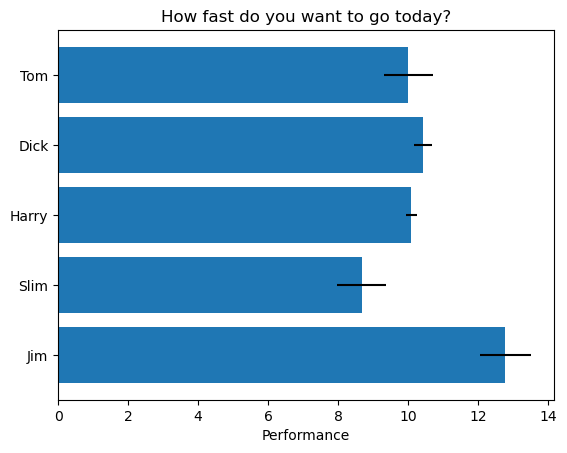

In [130]:
# 예시

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)   # 틱
ax.set_yticklabels(people)
ax.invert_yaxis()   # labels read top-to-bottom
ax.set_xlabel('Performance')    # 라벨
ax.set_title('How fast do you want to go today?')   # 타이틀

plt.show()

In [ ]:
##  5p~8p

In [ ]:
plt.rc('font', family='Malgun Gothic')
cnt, PNG, UNDERBAR = 0, '.png', '_'   #그래프를 이미지로 저장하고자 할 때 관련된 변수 목록
CHART_NAME = 'brokenLineExam'  # 차트이름

In [147]:
data = pd.read_csv('C:/Users/create/DV/주요발생국가주간동향(4월2째주).csv',index_col = '국가' )
data

,4월06일,4월07일,4월08일,4월09일,4월10일,4월11일,4월12일
국가,,,,,,,
미국,335524,364723,387547,424945,461437,495535,524903
스페인,130709,135032,140510,146690,152446,157022,161852
이탈리아,128948,132547,135586,139422,143626,147577,152271
독일,100024,102453,107591,112113,118181,122171,124908
프랑스,70478,74390,78167,82048,86334,90276,93790
중국,81708,81740,81802,81865,81907,81953,82052
영국,47806,51608,55242,60733,65077,73758,78991
이란,58226,60500,62589,64586,66220,68192,70029
스위스,21104,21652,22241,22789,23574,24308,24900


In [148]:
type(data)

pandas.core.frame.DataFrame

In [151]:
data.columns    ## str의 데이터타입 object인것 기억!

Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')

In [153]:
chartdata = data['4월06일']
chartdata

국가
미국      335524
스페인     130709
이탈리아    128948
독일      100024
프랑스      70478
중국       81708
영국       47806
이란       58226
스위스      21104
한국       10284
Name: 4월06일, dtype: int64

In [154]:
type(chartdata)    # 시리즈 타입

pandas.core.series.Series

In [ ]:
# chartdata 를 그래프로 표현!

Text(0.5, 1.0, '4월 6일 코로나 발생 건수')

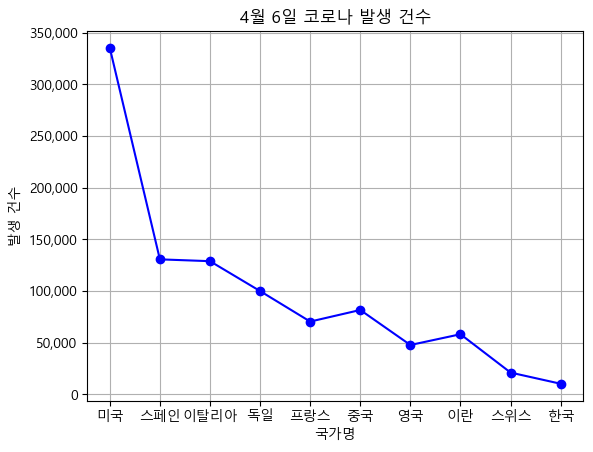

In [163]:
YTICKS_INTERVAL = 50000   # y축 눈금 각격 지정
maxlim = (int(chartdata.max() / YTICKS_INTERVAL) + 1) * YTICKS_INTERVAL  #최대 눈금의 값

plt.plot(chartdata, color = 'blue', linestyle = 'solid', marker = 'o')   # 그래프 그리기
values = np.arange(0, maxlim + 1, YTICKS_INTERVAL)  ##  y틱 라벨: 0 부터  350,000+1 까지  50000 나눠서 쓰겠다

plt.yticks(values, ['%s' % format(val, ',') for val in values])  
 # plt.yticks(values) 로토 출력 해주기
plt.grid(True)       # 모눈판 사용
 # x축 틱 라벨은 chartdata의 행인덱스로 채워짐
plt.xlabel('국가명')   

plt.ylabel("발생 건수")
plt.title('4월 6일 코로나 발생 건수')